<a href="https://colab.research.google.com/github/nini0119/CHATBOT-FOR-E-LEARNING/blob/main/Online_retail_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MERVEILLE ZOUNON & ULRIELLE NGOS

Une entreprise de retail en ligne souhaite mieux comprendre le comportement de ses clients afin de
développer des stratégies marketing ciblées. Le dataset Online Retail contient des transactions réalisées
par des clients d'un grossiste au Royaume-Uni entre 2010 et 2011. L'objectif est de segmenter les clients
en groupes distincts basés sur leurs comportements d'achat pour faciliter la création de campagnes
marketing adaptées à chaque segment : offres promotionnelles, recommandations de produits,
stratégies de fidélisation, etc.

In [ ]:
import pandas as pd

fichier_excel = "C:/Users/mirac/AI & PYTHON/Apprentissage_Non_Supervisé/Apprentissage_Non_Supervisé/online+retail/Online Retail.xlsx"

df = pd.read_excel(fichier_excel)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Statistiques de base
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Identification des valeurs manquantes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Traitement des valeurs manquantes

In [ ]:
# Remplacer les valeurs manquantes dans 'Description' par "Inconnu" (ou un texte par défaut)
df['Description'].fillna('Inconnu', inplace=True)


# Remplacer les valeurs manquantes dans 'CustomerID' par -1
df['CustomerID'].fillna(-1, inplace=True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
df = df.drop_duplicates()

Création d’une Variable de Montant Total

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Création des Indicateurs Agrégés

L'objectif est de regrouper les transactions par client (CustomerID) et de calculer des mesures synthétisant leur comportement d'achat.

1. Récence (Recency) :
Le temps écoulé depuis la dernière transaction d'un client jusqu'à la date d'analyse.

Exemple : si la dernière transaction a eu lieu il y a 10 jours, la récence sera 10.

In [ ]:
from datetime import datetime

# Définir une date d'analyse comme la date maximale des transactions
snapshot_date = df['InvoiceDate'].max()

# Calculer la récence par client
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days
}).rename(columns={'InvoiceDate': 'Recency'})


Fréquence (Frequency) :
Le nombre total de transactions d’un client (factures distinctes) sur la période analysée.

In [ ]:
# Compter le nombre de transactions uniques par client
rfm['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].nunique()


Valeur Monétaire (Monetary) :
Le montant total dépensé par un client.

In [ ]:
# Somme des montants dépensés par client
rfm['Monetary'] = df.groupby('CustomerID')['TotalPrice'].sum()


Analyse des Indicateurs Agrégés
Une fois les variables calculées, il est utile d’explorer leurs distributions et de traiter les éventuelles anomalies.

Explorer les distributions :

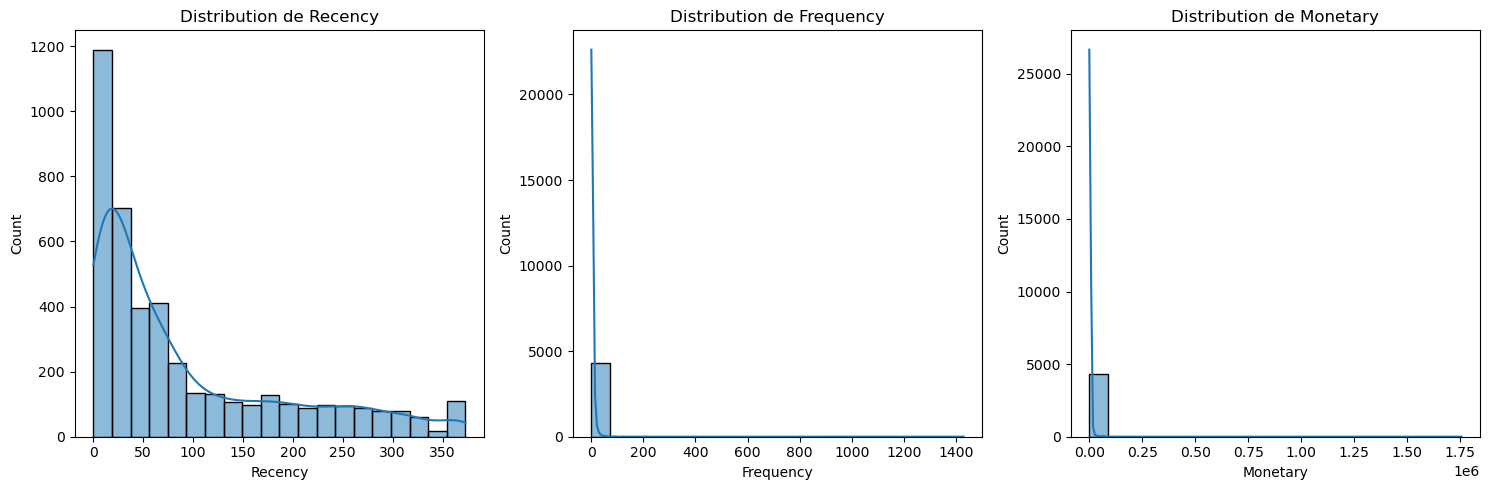

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(rfm[col], kde=True, bins=20)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


Traiter les valeurs extrêmes (outliers) : Les valeurs anormalement élevées peuvent biaiser le clustering. Utilisez l’IQR (Interquartile Range) pour identifier et gérer ces valeurs :

In [ ]:
for col in ['Recency', 'Frequency', 'Monetary']:
    Q1 = rfm[col].quantile(0.25)
    Q3 = rfm[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rfm = rfm[(rfm[col] >= lower_bound) & (rfm[col] <= upper_bound)]


Normalisation des Données
Pour que les variables aient une échelle comparable (important pour le clustering), normalisez les indicateurs RFM :

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisation des variables
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Convertir en DataFrame pour garder les noms de colonnes
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)


In [ ]:
rfm.describe()
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,3.604000e+03,3.604000e+03,3.604000e+03
mean,7.491849e-17,5.126002e-17,9.463388e-17
std,1.000139e+00,1.000139e+00,1.000139e+00
min,-1.012599e+00,-8.301206e-01,-1.151915e+00
25%,-7.778684e-01,-8.301206e-01,-7.481023e-01
50%,-3.866515e-01,-3.489764e-01,-3.334386e-01
75%,5.885962e-01,6.133120e-01,4.682211e-01
max,2.631307e+00,3.981321e+00,3.168875e+00


Visualisation des relations entre les variables agrégées :

C:\Users\mirac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


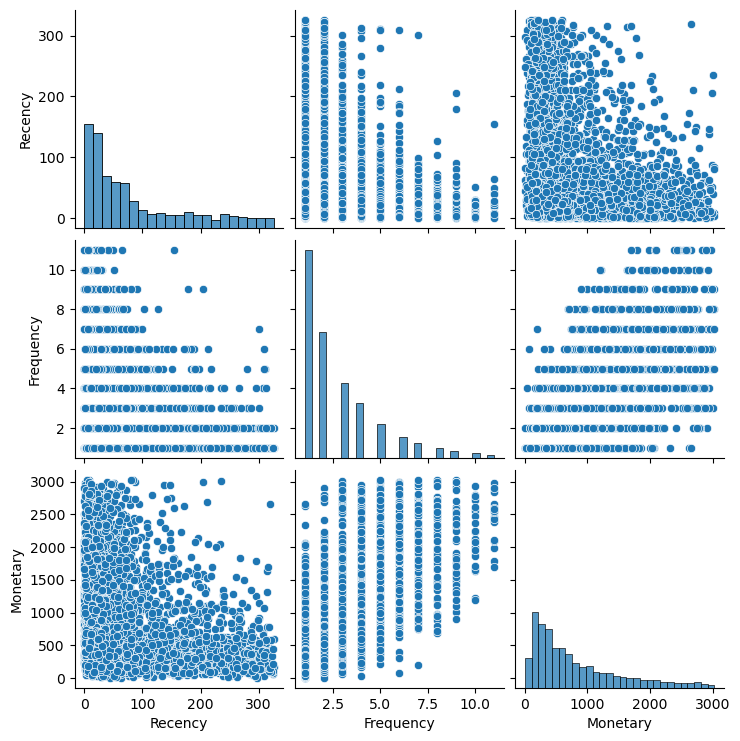

In [ ]:
sns.pairplot(rfm)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisation des données RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Vérification rapide des résultats
print(rfm_scaled[:5])  # Afficher les 5 premières lignes des données standardisées


[[-0.18545429  0.613312    1.40888732]
 [-0.8114013  -0.83012059  1.35221668]
 [ 2.44128761 -0.83012059 -0.67980198]
 [-0.62138167  2.53788879  2.42093442]
 [ 1.25645935 -0.83012059 -1.03019188]]


 Clustering K-means
1. Application des K-means :


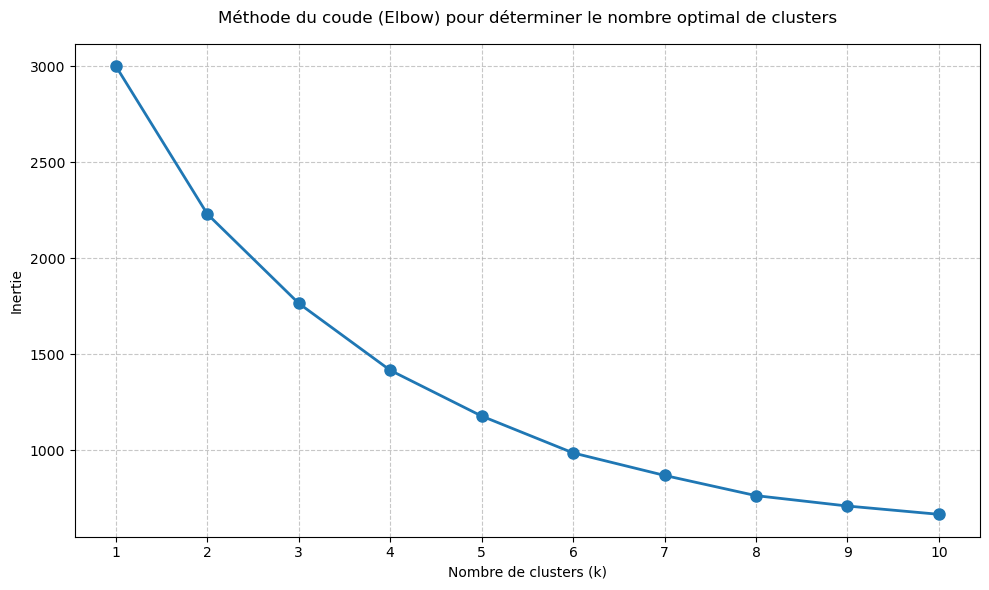


Statistiques descriptives par cluster:
         Recency  Frequency  Monetary
Cluster                              
0         227.43      35.50    247.95
1         271.41      12.48    579.46
2         142.01      35.79    750.81
3          81.47      15.54    383.70

Centres des clusters (valeurs d'origine):
           Recency  Frequency  Monetary
Cluster 0   227.43      35.50    247.95
Cluster 1   271.41      12.48    579.46
Cluster 2   142.01      35.79    750.81
Cluster 3    81.47      15.54    383.70


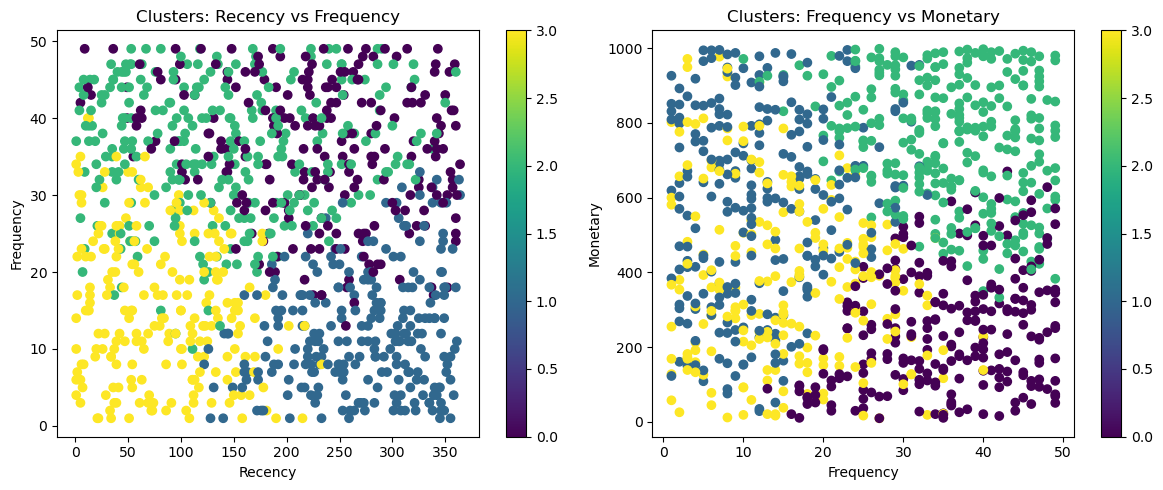

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt

# Création des données exemple (ou utilisez vos propres données)
np.random.seed(42)
df = pd.DataFrame({
    'Recency': np.random.randint(1, 365, 1000),
    'Frequency': np.random.randint(1, 50, 1000),
    'Monetary': np.random.randint(10, 1000, 1000)
})

# Standardisation des variables RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df)

# Calculer l'inertie pour différentes valeurs de k
inertia = []
k_range = range(1, 11)

for k in k_range:
    try:
        # Calculer les centroids
        centroids, distortion = kmeans(rfm_scaled, k)
        # Assigner les points aux clusters
        labels, dist = vq(rfm_scaled, centroids)
        # Calculer l'inertie totale
        inertia.append(sum(dist**2))
    except Exception as e:
        print(f"Erreur pour k={k}: {str(e)}")
        continue

if len(inertia) > 0:
    # Visualiser la courbe Elbow
    plt.figure(figsize=(10, 6))
    plt.plot(k_range[:len(inertia)], inertia, marker='o', linestyle='-',
             linewidth=2, markersize=8)
    plt.title('Méthode du coude (Elbow) pour déterminer le nombre optimal de clusters',
              fontsize=12, pad=15)
    plt.xlabel('Nombre de clusters (k)', fontsize=10)
    plt.ylabel('Inertie', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(k_range[:len(inertia)])
    plt.tight_layout()
    plt.show()

    # Appliquer k-means avec le nombre optimal de clusters
    optimal_k = 4  # À ajuster selon le graphique
    try:
        # Clustering final avec le k optimal
        centroids, distortion = kmeans(rfm_scaled, optimal_k)
        clusters, distances = vq(rfm_scaled, centroids)

        # Ajouter les clusters au DataFrame original
        df['Cluster'] = clusters

        # Afficher les statistiques descriptives par cluster
        print("\nStatistiques descriptives par cluster:")
        print(df.groupby('Cluster').agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': 'mean'
        }).round(2))

        # Afficher les centres des clusters
        cluster_centers = scaler.inverse_transform(centroids)
        cluster_centers_df = pd.DataFrame(
            cluster_centers,
            columns=['Recency', 'Frequency', 'Monetary'],
            index=[f'Cluster {i}' for i in range(optimal_k)]
        )
        print("\nCentres des clusters (valeurs d'origine):")
        print(cluster_centers_df.round(2))

        # Visualiser la distribution des clusters
        plt.figure(figsize=(12, 5))

        # Premier subplot : Recency vs Frequency
        plt.subplot(1, 2, 1)
        scatter = plt.scatter(df['Recency'], df['Frequency'],
                            c=df['Cluster'], cmap='viridis')
        plt.xlabel('Recency')
        plt.ylabel('Frequency')
        plt.title('Clusters: Recency vs Frequency')
        plt.colorbar(scatter)

        # Deuxième subplot : Frequency vs Monetary
        plt.subplot(1, 2, 2)
        scatter = plt.scatter(df['Frequency'], df['Monetary'],
                            c=df['Cluster'], cmap='viridis')
        plt.xlabel('Frequency')
        plt.ylabel('Monetary')
        plt.title('Clusters: Frequency vs Monetary')
        plt.colorbar(scatter)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erreur lors de l'application du clustering final: {str(e)}")
else:
    print("Impossible de calculer les clusters. Vérifiez vos données.")

 Clustering Hiérarchique
1. Appliquer le clustering hiérarchique :
Utilisez un dendrogramme pour visualiser les regroupements.

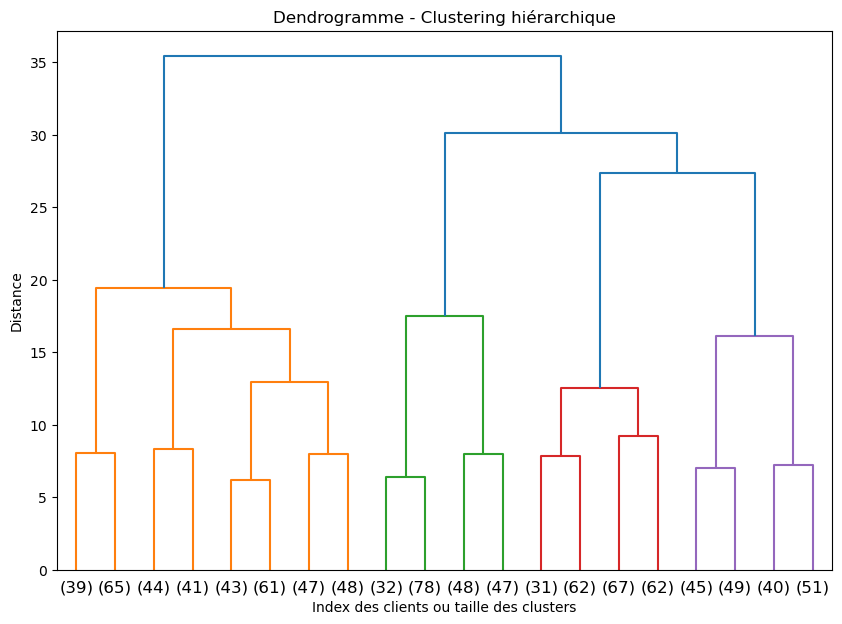

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcul des liens hiérarchiques
linkage_matrix = linkage(rfm_scaled, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)  # Troncature pour les derniers clusters
plt.title('Dendrogramme - Clustering hiérarchique')
plt.xlabel('Index des clients ou taille des clusters')
plt.ylabel('Distance')
plt.show()


2. Découper le dendrogramme en clusters

In [ ]:
# Créer un DataFrame temporaire pour les clusters
temp_df = rfm.iloc[:len(clusters)].copy()
temp_df['Cluster_Hierarchical'] = clusters

# Analyser les caractéristiques des clusters
hierarchical_means = temp_df.groupby('Cluster_Hierarchical').mean()
print(hierarchical_means)


                        Recency  Frequency    Monetary
Cluster_Hierarchical                                  
1                     90.324742   2.757732  914.452088
2                     88.400000   2.541463  897.201951
3                     95.819820   2.441441  809.713198
4                     96.686486   2.470270  753.117032


Réduction de Dimension avec PCA pour Visualisation

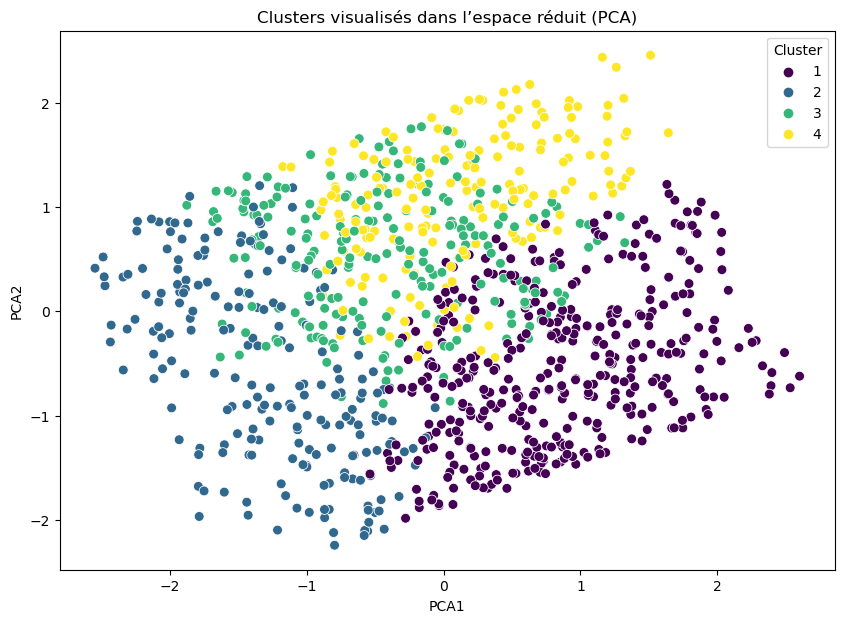

In [ ]:
# Créer un DataFrame temporaire pour PCA
temp_df = pd.DataFrame(rfm_pca, columns=['PCA1', 'PCA2'])

# Ajouter les clusters (par exemple, K-means ou hiérarchiques)
temp_df['Cluster'] = clusters  # Remplacez par la méthode que vous utilisez

# Visualisation des clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=temp_df, palette='viridis', s=50)
plt.title('Clusters visualisés dans l’espace réduit (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


Interprétation des clusters :
Structure des clusters :

Cluster 1 (violet) : Ce groupe est situé principalement en bas à droite du graphique. Les clients ici ont des caractéristiques distinctes des autres groupes dans l'espace PCA. Cela pourrait signifier des fréquences d'achat faibles ou élevées ou des valeurs monétaires spécifiques.
Cluster 2 (bleu) : Ce cluster est positionné en bas à gauche, regroupant des clients qui diffèrent fortement du cluster violet et des autres. Ce groupe peut représenter des clients ayant des achats plus récents ou des valeurs spécifiques dans une dimension RFM.
Cluster 3 (vert) : Situé au centre, il semble intermédiaire entre les clusters jaunes et les autres. Ce groupe pourrait représenter des clients modérés sur les dimensions RFM.
Cluster 4 (jaune) : En haut à droite, ces clients sont bien séparés et forment un groupe spécifique avec potentiellement des fréquences élevées ou des comportements uniques.
Séparation des clusters :

Les clusters sont bien distincts dans l'espace réduit, ce qui montre une bonne différenciation entre les segments. Cependant, les frontières entre le Cluster 3 (vert) et le Cluster 2 (bleu) ou le Cluster 4 (jaune) peuvent être un peu floues.
Tendances générales :

Les clusters s'étendent dans différentes directions de l'espace PCA, indiquant que chaque groupe a des caractéristiques bien différenciées dans les dimensions principales des données RFM.

Méthodes utilisées :

Les clusters sont issus d’une méthode comme K-means ou une autre méthode non hiérarchique, visualisés dans un espace réduit.
Deuxième image : Visualisation basée sur le clustering hiérarchique, montrant toutes les étapes du regroupement.
Cela permet de mettre en avant la répartition des clusters dans un espace géométrique simplifié (PCA). Plus adaptée pour interpréter visuellement les clusters et leurs relations dans un espace réduit.

Le dendrogramme  est souvent une étape exploratoire pour déterminer la structure des données et définir un nombre de clusters.
La PCA et la visualisation en 2D (première image) sont plus intuitives pour communiquer les résultats finaux et leur interprétation.
Conclusion :
Ces deux graphiques se complètent :

Le dendrogramme explique les regroupements hiérarchiques sous-jacents des clients.
La visualisation PCA montre les clusters finaux obtenus dans un espace réduit.

Analyse et Interprétation des Segments
1. Profilage des Segments
L’analyse des segments issus des méthodes de clustering permet de mieux comprendre les caractéristiques spécifiques des groupes de clients. Chaque segment peut refléter des comportements distincts, et il est important de formuler des recommandations spécifiques pour chaque groupe afin de maximiser les efforts marketing.

Exemples de segments et recommandations :
Clients récents et dépensiers :

Caractéristiques : Ce groupe inclut les clients qui ont récemment effectué des achats et qui dépensent une somme importante. Ils ont montré un intérêt fort pour vos produits/services.
Recommandations :
Programmes de fidélité : Proposez des programmes de fidélité pour encourager ces clients à revenir plus souvent et à dépenser davantage.
Offres exclusives : Envoyez-leur des offres exclusives, telles que des réductions sur leurs prochains achats ou des avantages supplémentaires pour leur prochain achat important.
Suivi personnalisé : Envoyez des recommandations personnalisées basées sur leurs achats récents pour augmenter la probabilité de conversions supplémentaires.
Clients fréquents mais à faible dépense :

Caractéristiques : Ces clients achètent souvent, mais dépensent moins à chaque fois. Ils peuvent être motivés par des promotions ou des produits à prix bas.
Recommandations :
Promotions sur volume ou packs : Proposez des promotions de type "acheter en gros" ou des packs à prix réduits pour encourager une dépense plus élevée lors de chaque achat.
Offres incitatives : Encouragez-les à augmenter leur panier moyen en offrant des réductions sur des produits complémentaires.
Programmes de points : Mettre en place un programme de points de fidélité qui récompense la fréquence des achats.
Clients inactifs ou peu fréquents :

Caractéristiques : Ce groupe regroupe des clients qui n'ont pas effectué d'achats récemment ou dont la fréquence d'achat a fortement diminué.
Recommandations :
Promotions de réactivation : Proposez des promotions personnalisées ou des réductions spéciales pour réactiver l'intérêt de ces clients (par exemple, une réduction sur leur prochain achat).
Emails de rappel : Envoyez des rappels ou des newsletters pour les inciter à revenir, en mettant en avant de nouveaux produits, services, ou offres exclusives.
Récompenses pour retour : Offrez des avantages pour leur retour, comme une remise sur leur prochain achat ou des cadeaux exclusifs.
Clients peu fréquents et peu dépensiers :

Caractéristiques : Ce groupe est constitué de clients qui achètent rarement et qui dépensent peu. Ils ne représentent pas encore un fort potentiel de revenus.
Recommandations :
Offres ciblées : Proposez des offres promotionnelles ou des échantillons gratuits pour encourager de nouveaux achats.
Augmenter l'engagement : Créez des campagnes marketing visant à accroître la fréquence d'achat en introduisant des avantages pour des achats répétés.
2. Comparaison des Clusters et Recommandations
Les segments peuvent être créés par différentes méthodes de clustering, comme K-means et le clustering hiérarchique. Chacune de ces méthodes offre une perspective différente, et une comparaison des résultats peut aider à affiner les actions marketing.

K-means :

Cette méthode de clustering est souvent plus rapide et plus adaptée pour des datasets de grande taille. Elle découpe les données en un nombre fixe de clusters, ce qui peut être utile pour des actions marketing bien définies et structurées.
Avantages :
Clusters bien définis, ce qui facilite l’assignation des clients à des segments spécifiques.
Facilité d’optimisation avec la réduction de dimensions (comme la PCA) pour une visualisation claire.
Limites :
Nécessite de spécifier le nombre de clusters à l'avance (bien que des techniques comme le "elbow method" puissent aider).
Moins efficace pour capturer des relations complexes ou des clusters qui ne sont pas bien séparés.
Clustering hiérarchique :

Cette méthode crée une hiérarchie d'objets, ce qui permet d’explorer différentes granularités des données et de visualiser la structure sous-jacente grâce au dendrogramme.
Avantages :
Permet de voir les regroupements à différentes étapes et de choisir un nombre de clusters à couper selon les besoins.
Plus flexible et capable de capturer des clusters imbriqués ou des structures complexes.
Limites :
Plus lent pour des datasets très volumineux.
Moins clair pour l'assignation finale des clients à des segments définis (par rapport à K-means).
Recommandations en fonction des clusters :
K-means et hiérarchique combinés : Utilisez les résultats du clustering hiérarchique pour explorer les différentes relations entre les clients et ajustez le nombre de clusters en fonction de ce que le dendrogramme révèle. Ensuite, appliquez K-means pour définir clairement les segments.
Segmentation par comportement client : Si les clusters issus de K-means montrent une séparation nette entre les clients dépensiers et non dépensiers, par exemple, des actions marketing ciblées peuvent être formulées selon ces segments. Si les clusters issus du dendrogramme sont plus imbriqués ou moins nets, une exploration plus approfondie des relations entre les groupes peut être nécessaire.
Actions marketing ciblées : Une fois que les segments sont bien définis, qu’ils proviennent de K-means ou du clustering hiérarchique, chaque groupe doit recevoir des actions marketing adaptées (ex. : offres spécifiques, communication sur mesure).
Conclusion :
K-means permet une segmentation rapide et claire, idéale pour des campagnes marketing bien structurées, tandis que le clustering hiérarchique offre une vue plus flexible et détaillée des relations entre les clients, permettant une exploration plus approfondie et une personnalisation fine des stratégies marketing. Ensemble, ces deux méthodes peuvent offrir une approche complète pour personnaliser les actions marketing et maximiser l'engagement des différents segments de clients.